In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [2]:
import subprocess
import json

class ClickHouse:
    
    def __init__(self, binary_path_):
        self.bin_path = binary_path_
    
    def run(self, query, silent=True):
        cmd = [self.bin_path, 'client', '-q', query, '-f', 'JSON']
        proc = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE) # https://unix.stackexchange.com/a/238185
        out, err = map(lambda x: x.decode('ascii'), proc.communicate())
        if not silent:
            print('CH: ' + out)
            print('CH: ' + err)
        return json.loads(out)

In [3]:
# init and test
ch = ClickHouse('/mnt/Disk3/programming/ClickHouse/build/dbms/programs/clickhouse')
print(ch.run('SELECT * from system.numbers where number > 10 limit 10'))

{'meta': [{'name': 'number', 'type': 'UInt64'}], 'data': [{'number': '11'}, {'number': '12'}, {'number': '13'}, {'number': '14'}, {'number': '15'}, {'number': '16'}, {'number': '17'}, {'number': '18'}, {'number': '19'}, {'number': '20'}], 'rows': 10, 'rows_before_limit_at_least': 65525, 'statistics': {'elapsed': 0.00017105, 'rows_read': 65536, 'bytes_read': 524288}}


In [4]:
def getTimes(count, *queries):
    result = []
    for query in queries:
        result.append([])
        for _ in range(count):
            result[-1].append(ch.run(query)['statistics']['elapsed'])
    return result

TEST_RUN = 50

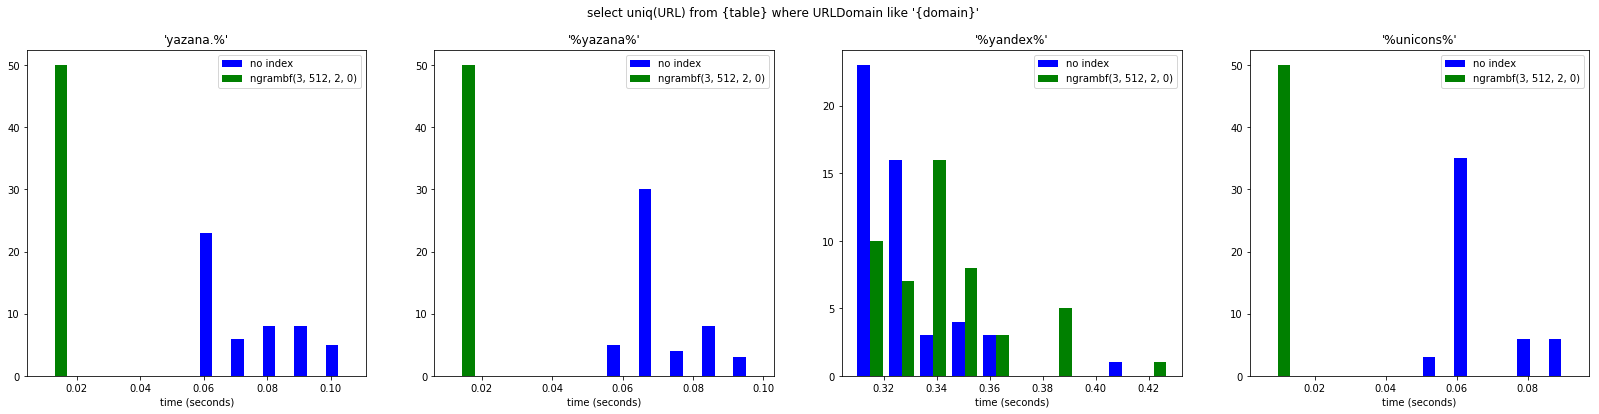

In [5]:
# URLDomain test
data_table = 'datasets.hits_v1'
no_index_table = 'datasets.hits_v1'
ngram_index_table = 'default.hits_3gram' # alter table hits_3gram add index domain (URLDomain) TYPE ngrambf(3, 512, 2, 0) GRANULARITY 1


test_tables = [no_index_table, ngram_index_table]
labels = ['no index', 'ngrambf(3, 512, 2, 0)']
colors = ['b', 'g']
query = 'select uniq(URL) from {table} where URLDomain like \'{domain}\''
domains= ['yazana.%', '%yazana%', '%yandex%', '%unicons%']


f, axs = plt.subplots(1, len(domains), figsize=(7 * len(domains), 6))
f.suptitle(query)

for i in range(len(domains)):
    times = getTimes(TEST_RUN, *[query.format(table=table, domain=domains[i]) for table in test_tables])
    axs[i].hist(times, color = ['b', 'g'], label=labels)
    axs[i].legend(labels)
    axs[i].set_xlabel('time (seconds)')
    axs[i].set_title("'{}'".format(domains[i]))

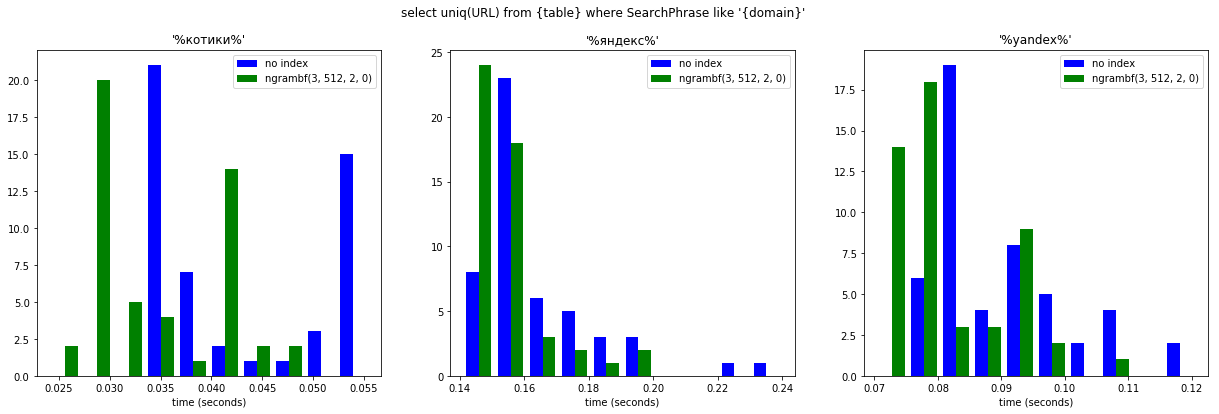

In [6]:
# SearchPhrase test
data_table = 'datasets.hits_v1'
no_index_table = 'datasets.hits_v1'
ngram_index_table = 'default.hits_3gram' # alter table hits_3gram add index domain (SearchPhrase) TYPE ngrambf(3, 512, 2, 0) GRANULARITY 1


test_tables = [no_index_table, ngram_index_table]
labels = ['no index', 'ngrambf(3, 512, 2, 0)']
colors = ['b', 'g']
query = 'select uniq(URL) from {table} where SearchPhrase like \'{domain}\''
domains= ['%котики%', '%яндекс%', '%yandex%']


f, axs = plt.subplots(1, len(domains), figsize=(7 * len(domains), 6))
f.suptitle(query)

for i in range(len(domains)):
    times = getTimes(TEST_RUN, *[query.format(table=table, domain=domains[i]) for table in test_tables])
    axs[i].hist(times, color = ['b', 'g'], label=labels)
    axs[i].legend(labels)
    axs[i].set_xlabel('time (seconds)')
    axs[i].set_title("'{}'".format(domains[i]))

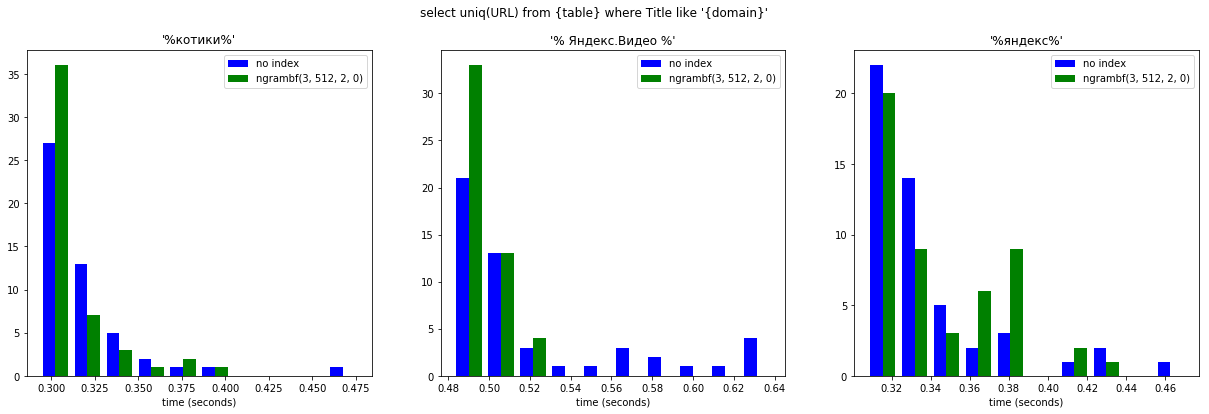

In [7]:
# Title test
data_table = 'datasets.hits_v1'
no_index_table = 'datasets.hits_v1'
ngram_index_table = 'default.hits_3gram' # alter table hits_3gram add index domain (Title) TYPE ngrambf(3, 512, 2, 0) GRANULARITY 1


test_tables = [no_index_table, ngram_index_table]
labels = ['no index', 'ngrambf(3, 512, 2, 0)']
colors = ['b', 'g']
query = 'select uniq(URL) from {table} where Title like \'{domain}\''
domains= ['%котики%', '% Яндекс.Видео %',  '%яндекс%']


f, axs = plt.subplots(1, len(domains), figsize=(7 * len(domains), 6))
f.suptitle(query)

for i in range(len(domains)):
    times = getTimes(TEST_RUN, *[query.format(table=table, domain=domains[i]) for table in test_tables])
    axs[i].hist(times, color = ['b', 'g'], label=labels)
    axs[i].legend(labels)
    axs[i].set_xlabel('time (seconds)')
    axs[i].set_title("'{}'".format(domains[i]))